In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from case_studies import *
from scipy.optimize import minimize
from case_studies import *

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

def calculate_x0(A,b,x):
    return np.array(x - np.linalg.pinv(A)@(A@x + b))

def SteepestDescent(x0, f, df, A, dims, c1, rho, tol, maxiter):
    x = x0
    x_list = []
    x_list.append(x)

    norms = []

    beta = 1
    A_AT = np.dot(A,A.T)
    A_ATinv = np.linalg.inv(A_AT)
    M = np.identity(dims) - A.T @ A_ATinv @ A
    
    for i in range(maxiter):          
        p = -np.dot(M,df(x))
        alpha = backtrack(x, f, df, p, c1, rho, beta)   
        x = x + alpha * p
        beta = alpha/rho
        x_list.append(x)
        # check if the norm of the gradient is smaller than the tolerance

        norm = np.linalg.norm(df(x)-A.T@(A_ATinv@A@df(x)))
        norms.append(norm)
        if norm < tol:
            break
    return x_list,norms

def backtrack(x, f, df, p_k, c1, rho, beta_k):
  alpha = beta_k
  while f(x+alpha*p_k) > f(x) + c1 * alpha * p_k @ df(x):
    alpha = rho * alpha
  return alpha

In [ ]:
def generate_A(rank,dim):
    while True:
        A = np.random.randint(low=10, high=100, size=(rank, dim))
        if np.linalg.matrix_rank(A) == rank:
            return np.reshape(A,(rank,dim))
        
def generate_b(rank):
    return np.random.randint(low=10, high=100,size = rank)


def generate_x0(A,b,dim):
    x = np.ones(dim)
    return calculate_x0(A,b,x)

In [ ]:
dim = 1000

#ranks = [20,100,300,500,700,900]
ranks = [20,100,400,700,900]
maxiter = 100

for rank in ranks:
    A = generate_A(rank,dim)
    b = generate_b(rank)
    x0 = generate_x0(A,b,dim)
    x_list,norms = SteepestDescent(x0, f1, df1, A, dim, 0.01, 0.5, 0.01, maxiter)
    axis = np.linspace(0,len(x_list),len(x_list)-1)
    plt.plot(axis,norms, label = str(rank))
    

plt.legend()
plt.title('Steepest Descent Convergence F1')
plt.xlabel('Iterations')
plt.ylabel("Stopping Criterion") 
plt.yscale("log") 
plt.show()



In [235]:
def is_hessian_definite(H: np.ndarray) -> bool:
    return np.all(np.linalg.eigvals(H) > 0)

def is_full_rank(A):
    return np.linalg.matrix_rank(A) == min(A.shape)

def BacktrackingLineSearch(x, d, f, df, method):
    alpha = 1
    rho = 0.5
    c = 0.1
    if method == 'SteepestDescent':
        alpha = 0.01
    while f(x + alpha * d) > f(x) + c * alpha * df(x) @ d:
        alpha = rho * alpha
    return alpha

def Newton(x0, f, df, A, ddf, tol, maxiter, b,m,dim):
    x = x0
    x_list = []
    x_list.append(x)

    norms = []
    A_ATinv = np.linalg.inv(A@A.T)

    for i in range(maxiter):
        if is_hessian_definite(ddf(x)):
            B = ddf(x)
        else:
            eig_vals, eig_vecs = np.linalg.eig(ddf(x))
            B = 0
            for i in range(len(eig_vecs)):
                B += eig_vals[i] * np.outer(eig_vecs[i], eig_vecs[i])
         
        first_term = np.block([[B, A.T], [A, np.zeros((m,m))]])
        second_term = np.block([-df(x), b])
        solution = np.linalg.solve(first_term, second_term)
        p_k = solution[:dim]
        alpha = BacktrackingLineSearch(x, p_k, f, df, 'Newton')
        x = x + alpha * p_k
        x_list.append(x)

        norm = np.linalg.norm(df(x)-A.T@(A_ATinv@A@df(x)))
        norms.append(norm)
         
        # check if the norm of the gradient is smaller than the tolerance
        if norm < tol:
            break
    return x_list,norms

In [240]:
dim = 1000

#ranks = [20,100,300,500,700,900]
rank = 900
maxiter = 10

A = generate_A(rank,dim)
b = generate_b(rank)
x0 = generate_x0(A,b,dim)


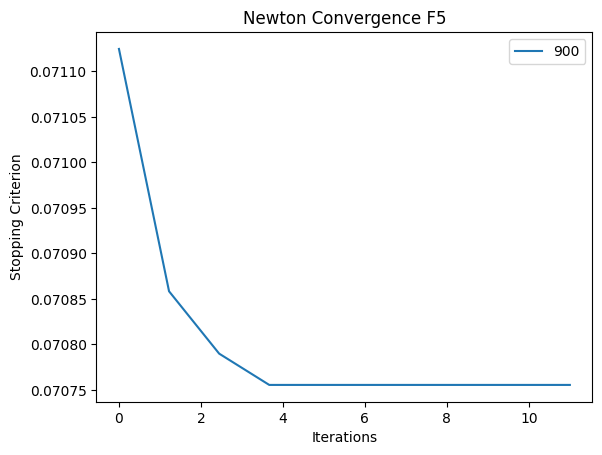

In [241]:
x_list,norms = Newton(x0,f5,df5,A,Hf5,0.01,maxiter,b,rank,dim)
axis = np.linspace(0,len(x_list),len(x_list)-1)

plt.plot(axis,norms, label = str(rank))
plt.legend()
plt.title('Newton Convergence F5')
plt.xlabel('Iterations')
plt.ylabel("Stopping Criterion")  
plt.show()